In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import json


Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [114]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

###  $H_{0}$ : Daily ridership in Oct-Dec 2017 is equal or higher than in Apr-Jun 2018

###  $H_{a}$ : Daily ridership in Oct-Dec 2017 is lower than in Apr-Jun 2018

In [115]:
datestring = '201601'
getCitiBikeCSV(datestring)

WARNING!!! something is wrong: the file is not there!


In [57]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [94]:
df_rendered = df[['tripduration','gender']]
df_rendered['tripduration']

0          923
1          379
2          589
3          889
4         1480
5          332
6         2321
7          694
8         1376
9          615
10        1770
11         525
12         667
13         240
14         539
15        1245
16         479
17         888
18         398
19         858
20         839
21         719
22         110
23         280
24         937
25        2038
26        2023
27         743
28        1236
29         662
          ... 
509448     148
509449    1333
509450     297
509451     438
509452     146
509453     785
509454     337
509455    1066
509456     952
509457    2164
509458     215
509459     514
509460     464
509461    1587
509462     440
509463     495
509464     294
509465     614
509466     141
509467     218
509468     224
509469     858
509470     533
509471     492
509472     326
509473    1275
509474    1576
509475     356
509476    1128
509477     851
Name: tripduration, dtype: int64

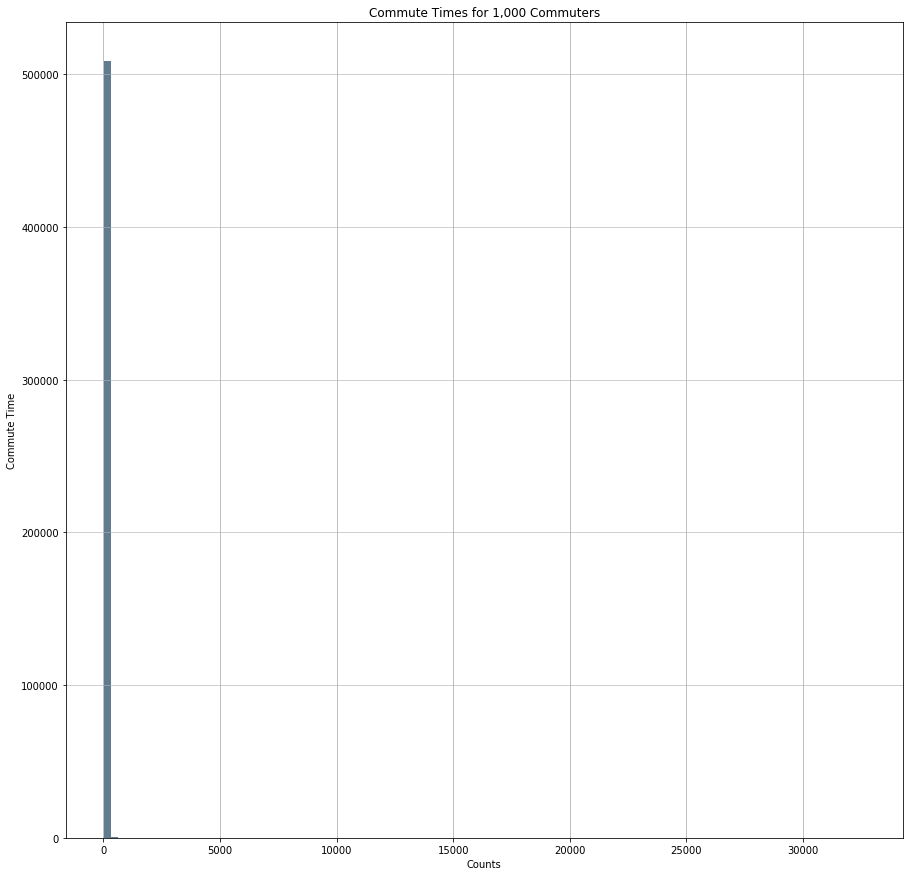

In [99]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(df_rendered['tripduration']/60)

commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [60]:
df_rendered.head()

,tripduration,gender
0,923,1
1,379,1
2,589,2
3,889,2
4,1480,1


In [73]:
df_female = df_rendered[df_rendered['gender'] == 2] 
df_female

,tripduration,gender
2,589,2
3,889,2
18,398,2
24,937,2
25,2038,2
27,743,2
38,1343,2
43,1092,2
44,1087,2
45,960,2


In [72]:
df_male = df_rendered[df_rendered['gender'] == 1] 
df_male

,tripduration,gender
0,923,1
1,379,1
4,1480,1
5,332,1
6,2321,1
7,694,1
8,1376,1
9,615,1
10,1770,1
11,525,1


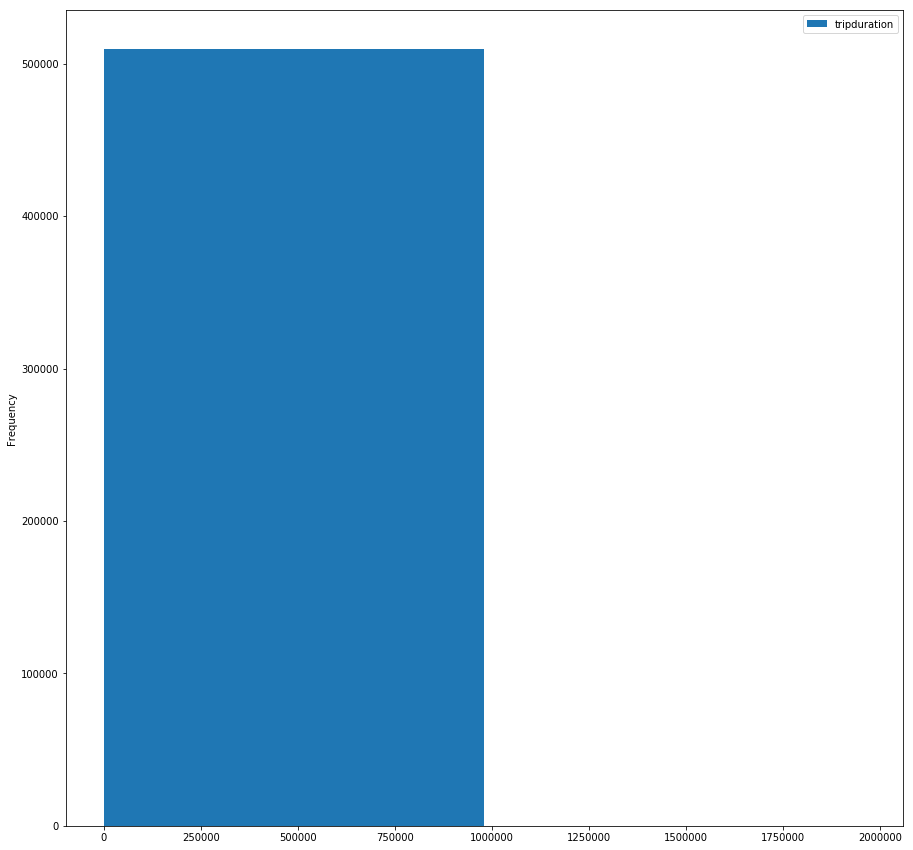

In [92]:
df_redac = df[df['gender'] == 1]
df_redac =df[['tripduration']]
df_redac
df_redac.plot.hist(bins=2)

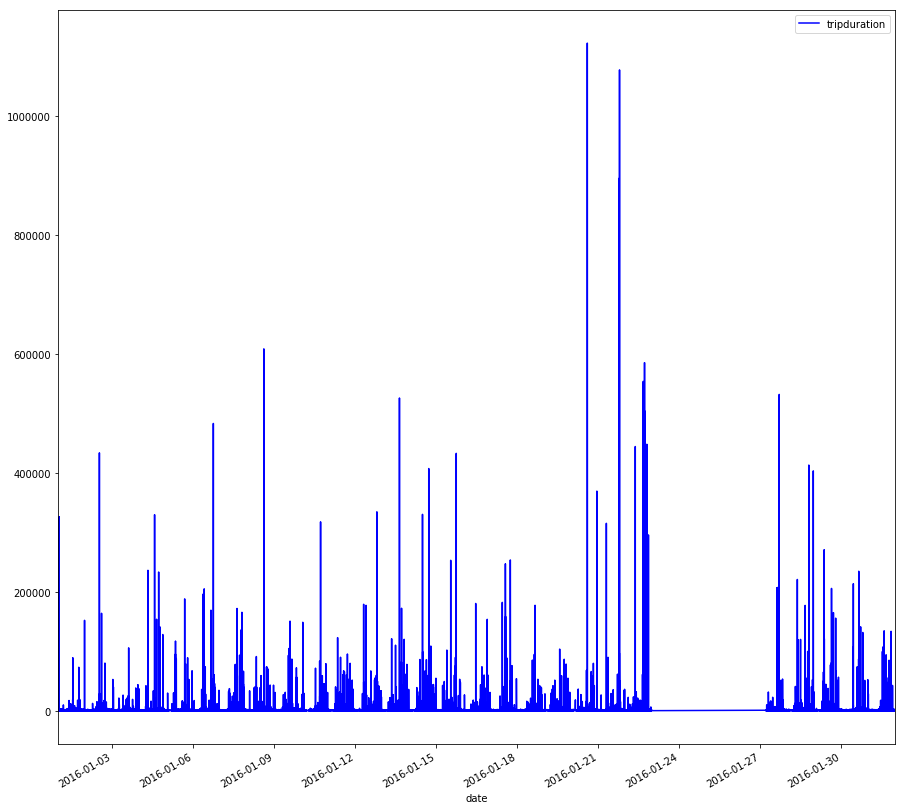

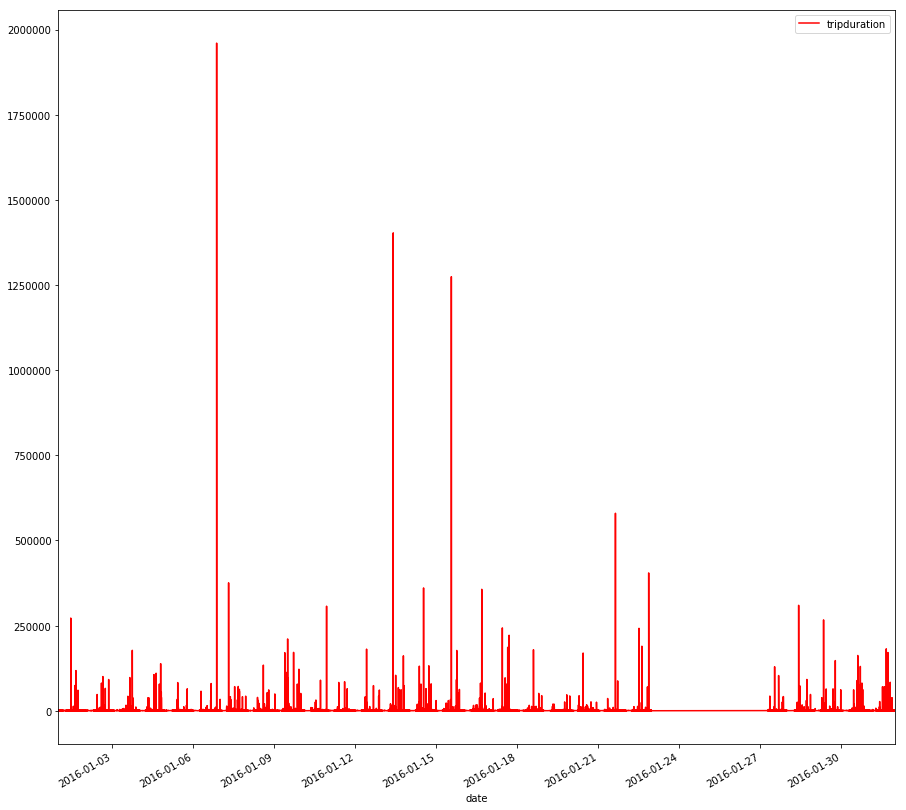

In [90]:
df[df['gender'] == 1].plot(x='date', y='tripduration',color='blue')
df[df['gender'] == 2].plot(x='date', y='tripduration',color='red')

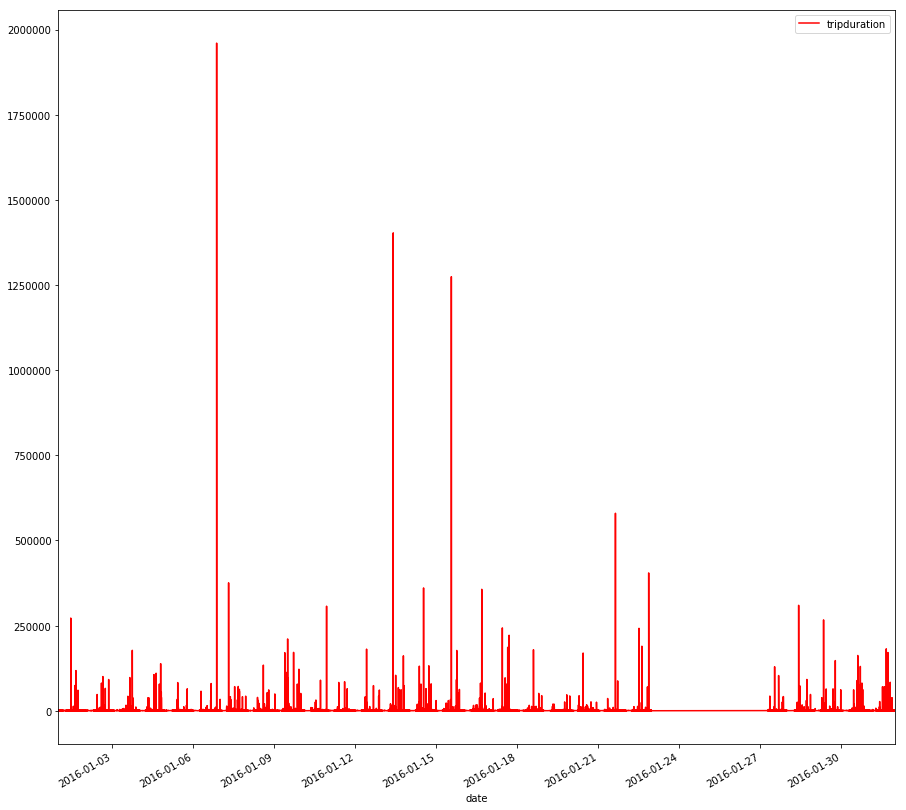

In [76]:
df[df['gender'] == 2].plot(x='date', y='tripduration',color='red')

In [65]:
df_female = df_rendered['gender'] == 2

In [ ]:
fig=pl.figure(figsize(15,10))

counts_w = df.date[df.gender == 2].groupby([df.date.dt.weekday]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df.date[df.gender==1].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['women bikers','men bikers'],fontsize=20)

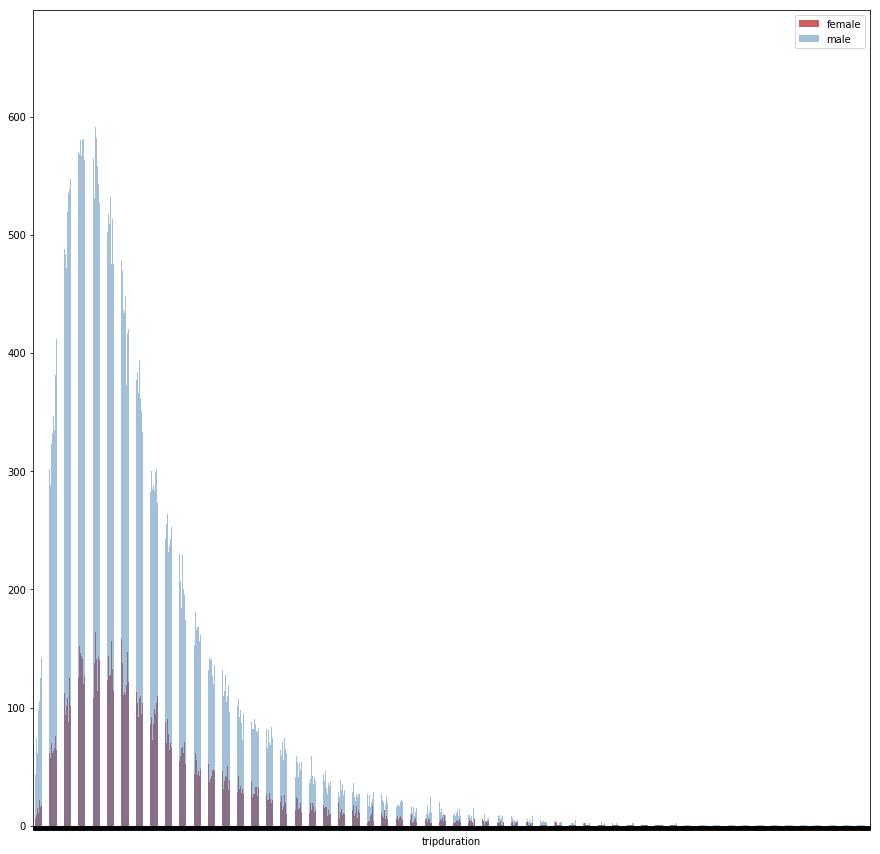

In [111]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['tripduration'][df['gender'] == 2].groupby(df['tripduration']).count())).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['tripduration'][df['gender'] == 1].groupby(df['tripduration']).count())).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels([''],color='white',rotation='45')
pl.legend()